# Machine Learning
* loading dataset and applying preprocessing
* Training multiple ML models
    * Looking at metrics for comparison of models
* Hyperparameter training on best model

### Loading dataset using module to apply preprocessing
* Development_Process.py

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
#importing module that wraps preprocessing steps
import Development_Preprocess as devp

In [3]:
#reimport if necessary (edit file after already imported)
import importlib
importlib.reload(devp)

<module 'Development_Preprocess' from '/Users/Temp/Data4380/Tabular Project - Development Dataset/Development_Preprocess.py'>

### Binary Classification

In [3]:
#loading dataset
donor=pd.read_csv('bio_data_table.csv')
giving=pd.read_csv('giving_data_table.csv')
df=devp.load_preprocess(donor,giving,binary=True)
df.head()

/Users/Temp/Data4380/Tabular Project - Development Dataset/Development_Preprocess.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past['Time Between']=past.groupby('ID')['gift date'].diff().dt.days
/Users/Temp/Data4380/Tabular Project - Development Dataset/Development_Preprocess.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past['Hard Credit']=past['credit Type']=='Hard-Credit'
/Users/Temp/Data4380/Tabular Project - Development Dataset/Development_Preprocess.py:75: SettingWithCopyWarning: 
A val

,Median_Time_Between,Average_Time_Between,Average_Amount,Time from First Gift,0,1,2,3,4,5,...,7727,7728,7729,7730,7731,7732,7733,7734,7735,Give in 2020?
0,1.000000,1.000000,0.00000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.113111,0.113111,0.00028,0.734134,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.113111,0.113111,0.00028,0.734134,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1.000000,0.00000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1.000000,0.00000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binary Classification: Models

In [4]:
#choosing ML algorithms for testing
names = [
    "Nearest Neighbors",
#    "Linear SVM",
    "Decision Tree",
    "Random Forest",
]

#creating classifier instances for each ML alg
classifier_instances = [
    KNeighborsClassifier(5),
#    SVC(kernel="linear", C=0.025, random_state=123),
    DecisionTreeClassifier(max_depth=5, random_state=123),
    RandomForestClassifier(max_depth=5, n_estimators=10, 
                           max_features=1, random_state=123),
]

#creating dictionary of classifier name and instance
classifiers = dict(zip(names,classifier_instances))

In [8]:
# iterate over datasets
import sys

def fit_all(dataset,classifiers, max_cls=None):
    scores=dict()
    curves=dict()
    # preprocess dataset, split into training and test part
    X = dataset.iloc[:,:-1] #excluding target var
    y = dataset.iloc[:,-1:] #only target var
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

    # iterate over classifiers
    for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
        print(cls_cnt,"Running classifier",cls_name,"on dataset",". N_Train = ",X_train.shape[0] )
        sys.stdout.flush()
        clf_0 = make_pipeline(StandardScaler(),clf)
        clf_0.fit(X_train.to_numpy(), y_train.to_numpy().reshape((len(y_train),)))
        score = clf.score(X_test.to_numpy(), y_test.to_numpy())

        scores[cls_name]=dict()
        scores[cls_name]['Score'] = score
        scores[cls_name]['Accuracy']=accuracy_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['Precision']=precision_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['Recall']=recall_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['F1']=f1_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['AUC-ROC']=roc_auc_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['ConfusionMatrix']=confusion_matrix(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))

        curves[cls_name]=dict()
        curves[cls_name]['FPR'],curves[cls_name]['TPR'],curves[cls_name]['Thresholds']=roc_curve(y_test.to_numpy(),clf_0.predict_proba(X_test.to_numpy())[:, 1])
        if max_cls:
            if cls_cnt>max_cls:
                print("Max Classifiers Reached.")
                sys.stdout.flush()
                break

    return scores, curves

In [9]:
scores, curves = fit_all(df,classifiers,2)

0 Running classifier Nearest Neighbors on dataset . N_Train =  70000
1 Running classifier Decision Tree on dataset . N_Train =  70000
2 Running classifier Random Forest on dataset . N_Train =  70000


In [10]:
from IPython.display import HTML, display
import tabulate

display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))


,Score,Accuracy,Precision,Recall,F1,AUC-ROC,ConfusionMatrix
Nearest Neighbors,0.543967,0.645233,0.625869,0.55758,0.589754,0.638342,[[11707 4573] [ 6070 7650]]
Decision Tree,0.6754,0.6754,0.585282,0.995918,0.737279,0.7006,[[ 6598 9682] [ 56 13664]]
Random Forest,0.542667,0.543,0.625,0.00182216,0.00363372,0.50045,[[16265 15] [13695 25]]


K Nearest Neighbhors
* AUC-ROC Score > not good, but model overall is not merely guessing
* Recall > model is pretty much guessing for positive classification (Does Give in 2020)

Decision Tree
* AUC-ROC Score > best of the bunch at 0.7006
* Recall > high, likely overly assigning positive classification

Random Forest
* AUC-ROC Score  > 0.50045, suggests model is merely guessing classification
* Recall > very low, likely overly assigning negative classification

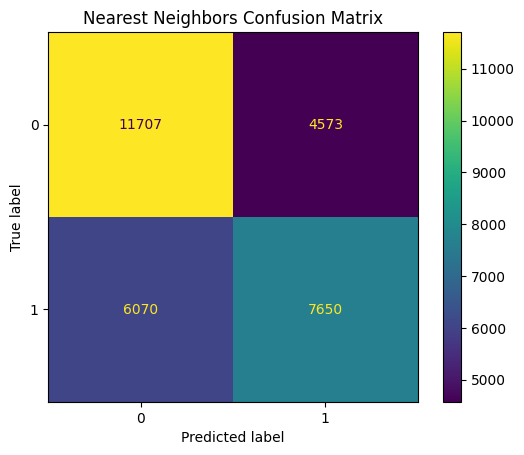

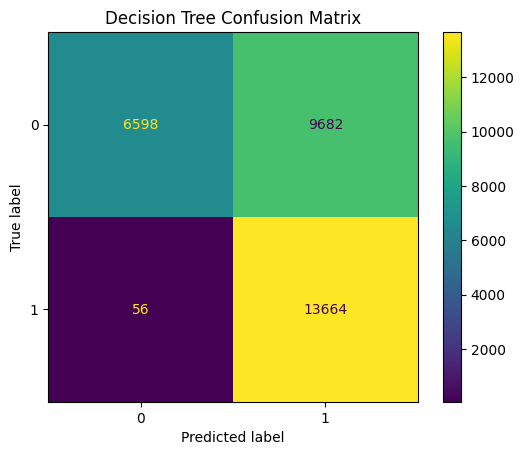

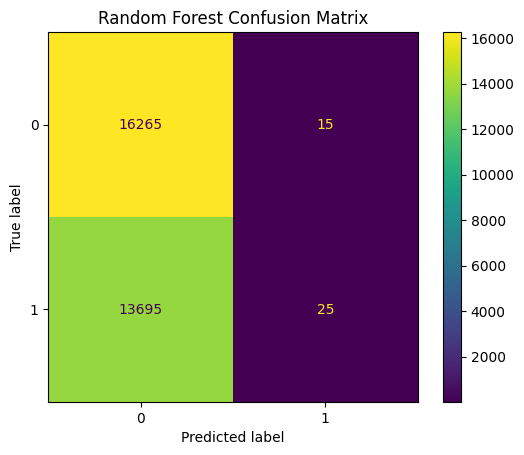

In [18]:
for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
    confusion=ConfusionMatrixDisplay(scores[cls_name]['ConfusionMatrix'])
    confusion.plot()
    plt.title(f'{cls_name} Confusion Matrix')

Confusion Matrix
* reflects thoughts from numerical metrics, as expected

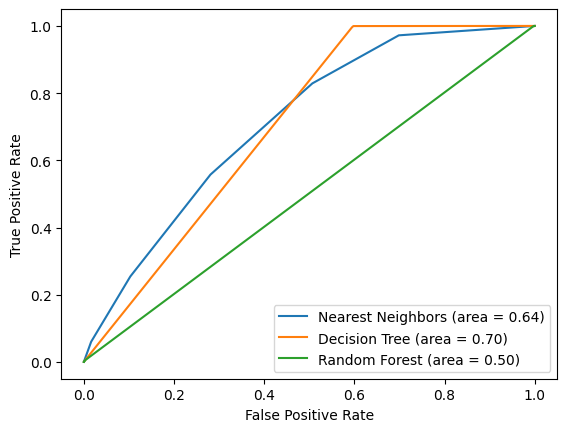

In [11]:
for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
    fpr=curves[cls_name]['FPR']
    tpr=curves[cls_name]['TPR']
    auc=scores[cls_name]['AUC-ROC']
    plt.plot(fpr,tpr,label=f'{cls_name} (area = {auc:.2f})')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Nearest Neighbors
* plot reflecting the AUC-ROC score discussed previously

Decision Tree
* weird shape, something is wrong (addressed in Development_Models notebook)

Random Forest
* reflects what was discussed previously, with nothing appearing to be wrong 